In [1]:
# importing the ncessary library 

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

In [2]:
# ignoring the uncessesary warnings 

import warnings as wrn 
wrn.filterwarnings('ignore')

In [3]:
# getting the data set 

dataset = pd.read_csv('X_train.csv')
pd.set_option('display.max_columns', None )
dataset.head(3)

,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontage_nan,MasVnrArea_nan,GarageYrBlt_nan
0,1,12.247694,0.235294,0.5,0.418208,0.366344,0.0,1.0,0.666667,1.0,0.0,0.75,0.0,0.181818,0.4,0.0,0.0,0.4,0.666667,0.500,0.036765,0.098361,0.0,0.0,0.7,0.7,0.25,0.12250,0.333333,0.666667,0.50,0.5,0.5,0.75,0.333333,0.125089,0.666667,0.0,0.064212,0.140098,0.0,0.0,1.0,0.666667,0.356155,0.413559,0.0,0.577712,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.500000,0.75,0.000000,1.0,0.0,0.046729,0.333333,0.5,0.386460,0.333333,0.333333,1.0,0.000000,0.111517,0.0,0.0,0.0,0.0,0.0,0.75,0.5,0.0,0.090909,0.50,0.666667,0.5,0.0,0.0,0.0
1,2,12.109011,0.000000,0.5,0.495064,0.391317,0.0,1.0,0.666667,1.0,0.0,0.50,0.0,1.000000,0.2,0.0,0.0,0.2,0.555556,0.875,0.227941,0.524590,0.0,0.0,0.4,0.4,0.50,0.00000,0.666667,0.666667,0.25,0.5,0.5,0.25,0.000000,0.173281,0.666667,0.0,0.121575,0.206547,0.0,0.0,1.0,0.666667,0.503056,0.000000,0.0,0.470245,0.000000,0.5,0.666667,0.0,0.375,0.333333,1.000000,0.333333,0.75,0.333333,0.8,0.0,0.289720,0.333333,0.5,0.324401,0.333333,0.333333,1.0,0.347725,0.000000,0.0,0.0,0.0,0.0,0.0,0.75,0.5,0.0,0.363636,0.25,0.666667,0.5,0.0,0.0,0.0
2,3,12.317167,0.235294,0.5,0.434909,0.422359,0.0,1.0,0.000000,1.0,0.0,0.75,0.0,0.181818,0.4,0.0,0.0,0.4,0.666667,0.500,0.051471,0.114754,0.0,0.0,0.7,0.7,0.25,0.10125,0.333333,0.666667,0.50,0.5,0.5,0.50,0.333333,0.086109,0.666667,0.0,0.185788,0.150573,0.0,0.0,1.0,0.666667,0.383441,0.419370,0.0,0.593095,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.333333,0.75,0.333333,0.8,0.0,0.065421,0.333333,0.5,0.428773,0.333333,0.333333,1.0,0.000000,0.076782,0.0,0.0,0.0,0.0,0.0,0.75,0.5,0.0,0.727273,0.50,0.666667,0.5,0.0,0.0,0.0


## feature selection using lasso and SelectFromModel  

In [4]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [5]:
# classifying as x_train and y_train 

y_train = dataset[['SalePrice']]
X_train = dataset.drop(['Id', 'SalePrice'], axis = 1)

In [6]:
X_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontage_nan,MasVnrArea_nan,GarageYrBlt_nan
0,0.235294,0.5,0.418208,0.366344,0.0,1.0,0.666667,1.0,0.0,0.75,0.0,0.181818,0.4,0.0,0.0,0.4,0.666667,0.500,0.036765,0.098361,0.0,0.0,0.7,0.7,0.25,0.12250,0.333333,0.666667,0.50,0.50,0.50,0.75,0.333333,0.125089,0.666667,0.0,0.064212,0.140098,0.0,0.0,1.0,0.666667,0.356155,0.413559,0.0,0.577712,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.500000,0.75,0.000000,1.0,0.0,0.046729,0.333333,0.50,0.386460,0.333333,0.333333,1.0,0.000000,0.111517,0.000000,0.0,0.0,0.0,0.0,0.75,0.5,0.0,0.090909,0.50,0.666667,0.5,0.0,0.0,0.0
1,0.000000,0.5,0.495064,0.391317,0.0,1.0,0.666667,1.0,0.0,0.50,0.0,1.000000,0.2,0.0,0.0,0.2,0.555556,0.875,0.227941,0.524590,0.0,0.0,0.4,0.4,0.50,0.00000,0.666667,0.666667,0.25,0.50,0.50,0.25,0.000000,0.173281,0.666667,0.0,0.121575,0.206547,0.0,0.0,1.0,0.666667,0.503056,0.000000,0.0,0.470245,0.000000,0.5,0.666667,0.0,0.375,0.333333,1.000000,0.333333,0.75,0.333333,0.8,0.0,0.289720,0.333333,0.50,0.324401,0.333333,0.333333,1.0,0.347725,0.000000,0.000000,0.0,0.0,0.0,0.0,0.75,0.5,0.0,0.363636,0.25,0.666667,0.5,0.0,0.0,0.0
2,0.235294,0.5,0.434909,0.422359,0.0,1.0,0.000000,1.0,0.0,0.75,0.0,0.181818,0.4,0.0,0.0,0.4,0.666667,0.500,0.051471,0.114754,0.0,0.0,0.7,0.7,0.25,0.10125,0.333333,0.666667,0.50,0.50,0.50,0.50,0.333333,0.086109,0.666667,0.0,0.185788,0.150573,0.0,0.0,1.0,0.666667,0.383441,0.419370,0.0,0.593095,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.333333,0.75,0.333333,0.8,0.0,0.065421,0.333333,0.50,0.428773,0.333333,0.333333,1.0,0.000000,0.076782,0.000000,0.0,0.0,0.0,0.0,0.75,0.5,0.0,0.727273,0.50,0.666667,0.5,0.0,0.0,0.0
3,0.294118,0.5,0.388581,0.390295,0.0,1.0,0.000000,1.0,0.0,0.00,0.0,0.227273,0.4,0.0,0.0,0.4,0.666667,0.500,0.669118,0.606557,0.0,0.0,0.8,0.9,0.50,0.00000,0.666667,0.666667,0.00,0.75,0.25,0.75,0.000000,0.038271,0.666667,0.0,0.231164,0.123732,0.0,0.5,1.0,0.666667,0.399941,0.366102,0.0,0.579157,0.333333,0.0,0.333333,0.0,0.375,0.333333,0.666667,0.416667,0.75,0.333333,0.4,0.6,0.074766,0.666667,0.75,0.452750,0.333333,0.333333,1.0,0.000000,0.063985,0.492754,0.0,0.0,0.0,0.0,0.75,0.5,0.0,0.090909,0.00,0.666667,0.0,0.0,0.0,0.0
4,0.235294,0.5,0.513123,0.468761,0.0,1.0,0.000000,1.0,0.0,0.50,0.0,0.590909,0.4,0.0,0.0,0.4,0.777778,0.500,0.058824,0.147541,0.0,0.0,0.7,0.7,0.25,0.21875,0.333333,0.666667,0.50,0.50,0.50,0.00,0.333333,0.116052,0.666667,0.0,0.209760,0.187398,0.0,0.0,1.0,0.666667,0.466237,0.509927,0.0,0.666523,0.333333,0.0,0.666667,0.5,0.500,0.333333,0.666667,0.583333,0.75,0.333333,0.8,0.0,0.074766,0.333333,0.75,0.589563,0.333333,0.333333,1.0,0.224037,0.153565,0.000000,0.0,0.0,0.0,0.0,0.75,0.5,0.0,1.000000,0.50,0.666667,0.5,0.0,0.0,0.0


In [7]:
# creating SelectFromModel object 
# select suitable alpha value (bigger alpha -> less feature , small alpha --> high features)

feature_sel = SelectFromModel(Lasso(alpha = 0.005, random_state = 0))  # same seed should be used for the test data set 
feature_sel.fit(X_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, copy_X=True, fit_intercept=True,
                                max_iter=1000, normalize=False, positive=False,
                                precompute=False, random_state=0,
                                selection='cyclic', tol=0.0001,
                                warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [8]:
feature_sel.get_support()        # it shows that , which feature is important or which is not 

array([False,  True, False, False, False, False,  True, False, False,
       False, False, False, False, False,  True, False,  True, False,
        True,  True, False, False, False, False, False, False,  True,
       False, False,  True, False,  True,  True, False, False, False,
       False, False, False,  True,  True, False,  True, False, False,
        True,  True, False,  True, False, False, False,  True, False,
       False,  True,  True,  True, False,  True,  True, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

In [9]:
# getting the features which are important 

X_train.columns[(feature_sel.get_support())] # important features 

Index(['MSZoning', 'LotShape', 'BldgType', 'OverallQual', 'YearBuilt',
       'YearRemodAdd', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1',
       'HeatingQC', 'CentralAir', '1stFlrSF', 'GrLivArea', 'BsmtFullBath',
       'FullBath', 'KitchenQual', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageCars', 'PavedDrive'],
      dtype='object')

In [10]:
selected_feature = X_train.columns[(feature_sel.get_support())]

In [11]:
print('total feature : ', X_train.shape[1])
print('total selected feature : ', len(selected_feature))
print('total features that shrink to zero : ', X_train.shape[1] - len(selected_feature))

total feature :  82
total selected feature :  23
total features that shrink to zero :  59


In [12]:
selected_feature

Index(['MSZoning', 'LotShape', 'BldgType', 'OverallQual', 'YearBuilt',
       'YearRemodAdd', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1',
       'HeatingQC', 'CentralAir', '1stFlrSF', 'GrLivArea', 'BsmtFullBath',
       'FullBath', 'KitchenQual', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageCars', 'PavedDrive'],
      dtype='object')

In [13]:
X_train = X_train[selected_feature]

# mode creation  

In [14]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge, Lasso, LinearRegression, ElasticNet, BayesianRidge
from sklearn.ensemble import RandomForestRegressor, ExtraTreesClassifier, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

In [15]:
model_list = [RandomForestRegressor(), ExtraTreesRegressor(), 
             Lasso(), Ridge(), ElasticNet(), BayesianRidge(),
             GradientBoostingRegressor(), KNeighborsRegressor(), DecisionTreeRegressor(), LinearRegression()]

model_name = ['RandomForestRegressor', 'ExtraTreesRegressor', 
             'Lasso', 'Ridge', 'ElasticNet', 'BayesianRidge', 'GradientBoostingRegressor', 
             'KNeighborsRegressor','DecisionTreeRegressor', 'LinearRegression' ]

In [16]:
def get_result(model_list, X = X_train, y = y_train):
    
    score = []
    for model in model_list:
            accuracy = cross_val_score(model, X_train, y_train)
            score.append(accuracy.mean())
            
    return pd.DataFrame({'model' : model_name, 'score' : score })

In [17]:
score = get_result(model_list)

In [18]:
score

,model,score
0,RandomForestRegressor,0.849315
1,ExtraTreesRegressor,0.852205
2,Lasso,-0.001246
3,Ridge,0.868024
4,ElasticNet,-0.001246
5,BayesianRidge,0.868554
6,GradientBoostingRegressor,0.879584
7,KNeighborsRegressor,0.749239
8,DecisionTreeRegressor,0.739582
9,LinearRegression,0.868539


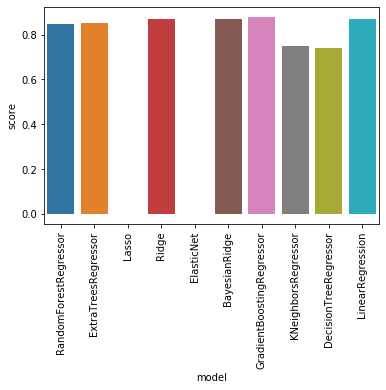

In [20]:
sns.barplot(score['model'], score['score'])
plt.xticks(rotation = 'vertical')
plt.show()

### hence , gradient boosting regressor is the best among all of them  